In [2]:
import time

notebook_start_time = time.time()

In [3]:
import sys
from pathlib import Path   
root_dir = str(Path().absolute().parent)

if root_dir not in sys.path:
    print(f"Adding the following directory to the PYTHONPATH: {root_dir}")
    sys.path.append(root_dir)

Adding the following directory to the PYTHONPATH: d:\Projects\ML\personalized-recommendation-sysyem\personalized-recommendation-system


In [4]:
import numpy as np
import pandas as pd
import polars as pl

print("NumPy Version:", np.__version__)
print("Pandas Version:", pd.__version__)
print("Polars Version:", pl.__version__)


NumPy Version: 1.26.4
Pandas Version: 2.1.4
Polars Version: 1.9.0


In [5]:
%load_ext autoreload
%autoreload 2

import warnings

warnings.filterwarnings("ignore")

from loguru import logger

from recsys import hopsworks_integration, training
from recsys.config import settings

In [6]:
project, fs = hopsworks_integration.get_feature_store()

2025-03-15 22:59:26.942 | INFO     | recsys.hopsworks_integration.feature_store:get_feature_store:13 - Loging to Hopsworks using HOPSWORKS_API_KEY env var.


2025-03-15 22:59:26,942 INFO: Initializing external client
2025-03-15 22:59:26,942 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-03-15 22:59:31,474 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1213659


Create Hopsworks Feature Views

In [5]:
feature_view = hopsworks_integration.feature_store.create_retrieval_feature_view(fs)

Feature view created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1213659/fs/1201283/fv/retrieval/version/1


In [50]:
df.head(3)

,customer_id,article_id,t_dat,price,month_sin,month_cos,age,club_member_status,age_group,garment_group_name,index_group_name
0,041d20ceba3aad6b18dff1b02a60207454c4405cb52e6e...,562245001,2018-09-21 00:00:00+00:00,0.022017,-1.000000,-1.836970e-16,33.0,ACTIVE,26-35,Trousers,Ladieswear
1,ee69a199eaa2869700cf9750bfc2556f30e4f6d7a602ff...,179123001,2018-10-13 00:00:00+00:00,0.006763,-0.866025,5.000000e-01,50.0,ACTIVE,46-55,Jersey Basic,Ladieswear
2,f298ea95e6d1ba4db1749db4c1af484496094d74f1d15c...,502186011,2018-09-26 00:00:00+00:00,0.033881,-1.000000,-1.836970e-16,20.0,ACTIVE,19-25,Knitwear,Ladieswear


In [51]:
df.info

<bound method DataFrame.info of                                                customer_id article_id  \
0        041d20ceba3aad6b18dff1b02a60207454c4405cb52e6e...  562245001   
1        ee69a199eaa2869700cf9750bfc2556f30e4f6d7a602ff...  179123001   
2        f298ea95e6d1ba4db1749db4c1af484496094d74f1d15c...  502186011   
3        06a475ce6e0a0325f25233aad8bf895579d5a284ff3658...  399256018   
4        85b63162ef07f4e3d930a0c8af358b2bdfb972d94b12a8...  542846001   
...                                                    ...        ...   
1356037  3a7ef6857c8b1d849abc96f6670d082a70a36548ffc775...  569526002   
1356038  9359afbfe5f8337cc2ee425080b4b396068eeb404955fa...  537346026   
1356039  b747cb3c97c06fe45f97b7d3dd2f3bbc8b545ed4e99211...  624637001   
1356040  c4e58904f623d06243951ff7d85ee41ab38598dd7347fb...  569526002   
1356041  a6d3d2528f095fc4623263449883291bf01e9ab91e43db...  537346026   

                            t_dat     price  month_sin     month_cos   age  \
0       2018-

In [6]:
# feature_view.head(3)
df = feature_view.get_batch_data()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (88.27s) 


In [18]:
df.head()

,customer_id,article_id,t_dat,price,month_sin,month_cos,age,club_member_status,age_group,garment_group_name,index_group_name
0,041d20ceba3aad6b18dff1b02a60207454c4405cb52e6e...,562245001,2018-09-21 00:00:00+00:00,0.022017,-1.000000,-1.836970e-16,33.0,ACTIVE,26-35,Trousers,Ladieswear
1,897f4750d3b34dfcbb73f8b4727ba8de7d6587f732e872...,156231001,2018-09-26 00:00:00+00:00,0.005661,-1.000000,-1.836970e-16,24.0,ACTIVE,19-25,Socks and Tights,Ladieswear
2,ee69a199eaa2869700cf9750bfc2556f30e4f6d7a602ff...,179123001,2018-10-13 00:00:00+00:00,0.006763,-0.866025,5.000000e-01,50.0,ACTIVE,46-55,Jersey Basic,Ladieswear
3,f298ea95e6d1ba4db1749db4c1af484496094d74f1d15c...,502186011,2018-09-26 00:00:00+00:00,0.033881,-1.000000,-1.836970e-16,20.0,ACTIVE,19-25,Knitwear,Ladieswear
4,06a475ce6e0a0325f25233aad8bf895579d5a284ff3658...,399256018,2018-10-13 00:00:00+00:00,0.013559,-0.866025,5.000000e-01,20.0,ACTIVE,19-25,Trousers,Ladieswear


In [22]:
import pandas as pd

# Check for missing values
print(df.isnull().sum())

# # Fill or drop missing values
# df = df.fillna("Unknown")  # If categorical
# # OR
# df = df.dropna()  # If you want to remove missing values


customer_id              0
article_id               0
t_dat                    0
price                    0
month_sin                0
month_cos                0
age                   6166
club_member_status    6166
age_group             6166
garment_group_name       0
index_group_name         0
dtype: int64


Create training dataset
You will train your retrieval model with a subset of features.

For the query embedding you will use:

customer_id: ID of the customer.
age: age of the customer at the time of purchase.
month_sin, month_cos: time of year the purchase was made.
For the candidate embedding you will use:

article_id: ID of the item.
garment_group_name: type of garment.
index_group_name: menswear/ladieswear etc.

In [6]:
import hopsworks

project_rec_sys = hopsworks.login()

fs = project_rec_sys.get_feature_store()

2025-03-11 09:43:01,352 INFO: Closing external client and cleaning up certificates.
Connection closed.
2025-03-11 09:43:01,358 INFO: Initializing external client
2025-03-11 09:43:01,358 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-03-11 09:43:03,787 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1213659


In [7]:
# Retrieve an existing feature group
customers_fg = fs.get_feature_group("customers", version=1)

In [5]:
from recsys.config import settings

In [9]:
import requests
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

# Set up session with retries and timeouts
session = requests.Session()
retries = Retry(total=5, backoff_factor=1, status_forcelist=[502, 503, 504])
session.mount('https://', HTTPAdapter(max_retries=retries))
session.request = lambda method, url, **kwargs: super(requests.Session, session).request(
    method=method, url=url, **kwargs, timeout=60
)

In [10]:
import hopsworks

project_rec_sys = hopsworks.login()

fs = project_rec_sys.get_feature_store()

2025-03-11 14:42:44,367 INFO: Closing external client and cleaning up certificates.
Connection closed.
2025-03-11 14:42:44,417 INFO: Initializing external client
2025-03-11 14:42:44,417 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-03-11 14:42:46,803 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1213659


In [11]:
df = customers_fg.read()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (71.29s) 


In [35]:
df.info

<bound method DataFrame.info of                                                customer_id club_member_status  \
0        60e899b2690a105abec352034a53a467b8ed96d9a89979...             ACTIVE   
1        31ebdbf868123fc9f0bf86abf59c0e6c731c8493f39e35...             ACTIVE   
2        eeff84ec7c3424a535b95921d12f087222cb05fb1ee17d...             ACTIVE   
3        546f437479fb0392649af419177edd9438df9b9e9e4a52...             ACTIVE   
4        0c310cf583451158e8f2ae158b6d6da47ccba5d49c1f08...             ACTIVE   
...                                                    ...                ...   
1356114  7ba5d63152ca9d2e5136043f60d786abfba0bd529f1cf8...             ACTIVE   
1356115  1fc0abe4eacb4325a9872d87f76dd21eb1a8aa072c911f...             ACTIVE   
1356116  48ffc99e4c55bc21e17eed951f63b5090bd66915607513...             ACTIVE   
1356117  22854d2218d43316c3378545d675c81ac6622102e8b6f6...             ACTIVE   
1356118  e6b3d24b316ff6fc4e4d722e17319b151d6a3c9729745a...             ACTIVE

In [14]:
df.head(3)

,customer_id,club_member_status,age,postal_code,age_group
0,60e899b2690a105abec352034a53a467b8ed96d9a89979...,ACTIVE,31.0,6bb39a1786f759b8168f5eabae3392ec5608abd1907283...,26-35
1,31ebdbf868123fc9f0bf86abf59c0e6c731c8493f39e35...,ACTIVE,23.0,c8f5183177a51a73b123121543f3690988f1d00f360aeb...,19-25
2,eeff84ec7c3424a535b95921d12f087222cb05fb1ee17d...,ACTIVE,35.0,a0a6ea5d048a47e882897b79e0e9b58500a424ab1a8ade...,26-35


In [17]:
# df.null_count()
print(df.isnull().sum())

customer_id           0
club_member_status    0
age                   0
postal_code           0
age_group             0
dtype: int64


In [18]:
articles_fg = fs.get_feature_group("articles", version=1)

In [20]:
article_df = articles_fg.read()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (129.07s) 


In [34]:
article_df.info

<bound method DataFrame.info of        article_id  product_code                    prod_name  product_type_no  \
0       879248004        879248                     Glamping              274   
1       501619020        501619  Victory regular voile shirt              259   
2       642895007        642895           Shorts H.W Stretch              274   
3       744287001        744287              TD Flint stripe              259   
4       530729007        530729               Sophia Slipper              302   
...           ...           ...                          ...              ...   
105537  857267002        857267                 Linda Blouse              258   
105538  653290005        653290             RAVEN pocket tee              255   
105539  875014001        875014                  River Cargo              272   
105540  640134004        640134          La Paz Cardigan (1)              245   
105541  568601018        568601                     Mariette              264

In [21]:
article_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,prod_name_length,article_description,embeddings,image_url
0,879248004,879248,Glamping,274,Shorts,Garment Lower body,1010016,Solid,51,Light Pink,...,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,8,Glamping - Shorts in Garment Lower body\nAppea...,"[0.0036141646560281515, 0.09988906979560852, 0...",87/0879248004.jpg
1,501619020,501619,Victory regular voile shirt,259,Shirt,Garment Upper body,1010001,All over pattern,8,Dark Grey,...,3,Menswear,20,Contemporary Smart,1011,Shirts,27,Victory regular voile shirt - Shirt in Garment...,"[-0.01638726145029068, 0.12015945464372635, -0...",50/0501619020.jpg
2,642895007,642895,Shorts H.W Stretch,274,Shorts,Garment Lower body,1010023,Denim,73,Dark Blue,...,2,Divided,57,Ladies Denim,1016,Trousers Denim,18,Shorts H.W Stretch - Shorts in Garment Lower b...,"[-0.010319815017282963, 0.09397119283676147, 0...",64/0642895007.jpg
3,744287001,744287,TD Flint stripe,259,Shirt,Garment Upper body,1010001,All over pattern,73,Dark Blue,...,3,Menswear,23,Men Suits & Tailoring,1011,Shirts,15,TD Flint stripe - Shirt in Garment Upper body\...,"[-0.10063223540782928, 0.0314287431538105, -0....",74/0744287001.jpg
4,530729007,530729,Sophia Slipper,302,Socks,Socks & Tights,1010016,Solid,7,Grey,...,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,14,Sophia Slipper - Socks in Socks & Tights\nAppe...,"[-0.09072019159793854, -0.08081255853176117, 0...",53/0530729007.jpg


In [22]:
print(article_df.isnull().sum())

article_id                      0
product_code                    0
prod_name                       0
product_type_no                 0
product_type_name               0
product_group_name              0
graphical_appearance_no         0
graphical_appearance_name       0
colour_group_code               0
colour_group_name               0
perceived_colour_value_id       0
perceived_colour_value_name     0
perceived_colour_master_id      0
perceived_colour_master_name    0
department_no                   0
department_name                 0
index_code                      0
index_name                      0
index_group_no                  0
index_group_name                0
section_no                      0
section_name                    0
garment_group_no                0
garment_group_name              0
prod_name_length                0
article_description             0
embeddings                      0
image_url                       0
dtype: int64


In [24]:
transactions_fg = fs.get_feature_group("transactions", version=1)

In [25]:
transactions_df = transactions_fg.read()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (61.17s) 


In [33]:
transactions_df.info

<bound method DataFrame.info of                             t_dat  \
0       2018-10-21 00:00:00+00:00   
1       2018-09-28 00:00:00+00:00   
2       2018-10-09 00:00:00+00:00   
3       2018-09-29 00:00:00+00:00   
4       2018-10-08 00:00:00+00:00   
...                           ...   
1356037 2018-10-15 00:00:00+00:00   
1356038 2018-10-10 00:00:00+00:00   
1356039 2018-10-17 00:00:00+00:00   
1356040 2018-09-25 00:00:00+00:00   
1356041 2018-10-03 00:00:00+00:00   

                                               customer_id article_id  \
0        325b63f3afd49ad98305e8ca136f56d156a9782d953195...  640727001   
1        5d3190aa6e12099cc77ec23b6817a9a33476b56bf963dc...  675657002   
2        139711369b0211ce8ee7be62fa1f242b3d7c551963e37a...  633130002   
3        d720bbc24bcf9cfa2841fd6c94ba6e82bc705540161178...  688873012   
4        e152a460da5b376e64f36f3e2ea4dde14f637d9e53c938...  637549002   
...                                                    ...        ...   
1356037  f1b

In [26]:
transactions_df.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,day,day_of_week,month_sin,month_cos
0,2018-10-21 00:00:00+00:00,325b63f3afd49ad98305e8ca136f56d156a9782d953195...,640727001,0.050831,2,2018,10,21,7,-0.866025,5.000000e-01
1,2018-09-28 00:00:00+00:00,5d3190aa6e12099cc77ec23b6817a9a33476b56bf963dc...,675657002,0.042356,1,2018,9,28,5,-1.000000,-1.836970e-16
2,2018-10-09 00:00:00+00:00,139711369b0211ce8ee7be62fa1f242b3d7c551963e37a...,633130002,0.016932,2,2018,10,9,2,-0.866025,5.000000e-01


In [27]:
print(transactions_df.isnull().sum())

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
year                0
month               0
day                 0
day_of_week         0
month_sin           0
month_cos           0
dtype: int64


In [29]:
feature_view = hopsworks_integration.feature_store.create_retrieval_feature_view(fs)

In [ ]:
feature_view_df = feature_view.get_batch_data()

In [40]:
feature_view_df.head()

,customer_id,article_id,t_dat,price,month_sin,month_cos,age,club_member_status,age_group,garment_group_name,index_group_name
0,041d20ceba3aad6b18dff1b02a60207454c4405cb52e6e...,562245001,2018-09-21 00:00:00+00:00,0.022017,-1.000000,-1.836970e-16,33.0,ACTIVE,26-35,Trousers,Ladieswear
1,897f4750d3b34dfcbb73f8b4727ba8de7d6587f732e872...,156231001,2018-09-26 00:00:00+00:00,0.005661,-1.000000,-1.836970e-16,24.0,ACTIVE,19-25,Socks and Tights,Ladieswear
2,ee69a199eaa2869700cf9750bfc2556f30e4f6d7a602ff...,179123001,2018-10-13 00:00:00+00:00,0.006763,-0.866025,5.000000e-01,50.0,ACTIVE,46-55,Jersey Basic,Ladieswear
3,f298ea95e6d1ba4db1749db4c1af484496094d74f1d15c...,502186011,2018-09-26 00:00:00+00:00,0.033881,-1.000000,-1.836970e-16,20.0,ACTIVE,19-25,Knitwear,Ladieswear
4,06a475ce6e0a0325f25233aad8bf895579d5a284ff3658...,399256018,2018-10-13 00:00:00+00:00,0.013559,-0.866025,5.000000e-01,20.0,ACTIVE,19-25,Trousers,Ladieswear


In [41]:
feature_view_df.info

<bound method DataFrame.info of                                                customer_id article_id  \
0        041d20ceba3aad6b18dff1b02a60207454c4405cb52e6e...  562245001   
1        897f4750d3b34dfcbb73f8b4727ba8de7d6587f732e872...  156231001   
2        ee69a199eaa2869700cf9750bfc2556f30e4f6d7a602ff...  179123001   
3        f298ea95e6d1ba4db1749db4c1af484496094d74f1d15c...  502186011   
4        06a475ce6e0a0325f25233aad8bf895579d5a284ff3658...  399256018   
...                                                    ...        ...   
1356037  4e4153b537de156ea3621b3d8c10e494ad006675db8640...  637230001   
1356038  cfc53d9e30d6b6099c070607d8351b91373425e1c211c0...  565329001   
1356039  2ab3170b9d600496d59ff326651b58b4e01d87f886ad7d...  648940001   
1356040  431272e9c9c6e3cc6290d7cebb722f31ec26e509c8e826...  399256001   
1356041  b9f3f299cbbc3f4ada3d07a7190d0170d3b6c103fd8c74...  569526002   

                            t_dat     price  month_sin     month_cos   age  \
0       2018-

In [31]:
print(feature_view_df.isnull().sum())

customer_id              0
article_id               0
t_dat                    0
price                    0
month_sin                0
month_cos                0
age                   6166
club_member_status    6166
age_group             6166
garment_group_name       0
index_group_name         0
dtype: int64


In [8]:
feature_view = fs.get_feature_view('retrieval', version=1)

In [15]:
feature_view_df = feature_view.get_batch_data()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (252.68s) 


In [16]:
feature_view_df.head()

,customer_id,article_id,price,month_sin,month_cos,age,garment_group_name,index_group_name
0,041d20ceba3aad6b18dff1b02a60207454c4405cb52e6e...,562245001,0.022017,-1.000000,-1.836970e-16,33.0,Trousers,Ladieswear
1,897f4750d3b34dfcbb73f8b4727ba8de7d6587f732e872...,156231001,0.005661,-1.000000,-1.836970e-16,24.0,Socks and Tights,Ladieswear
2,2903be9edbb78dae781f36a63905e8202a8781884f2d88...,504152001,0.025407,-0.866025,5.000000e-01,31.0,Knitwear,Ladieswear
3,ee69a199eaa2869700cf9750bfc2556f30e4f6d7a602ff...,179123001,0.006763,-0.866025,5.000000e-01,50.0,Jersey Basic,Ladieswear
4,f298ea95e6d1ba4db1749db4c1af484496094d74f1d15c...,502186011,0.033881,-1.000000,-1.836970e-16,20.0,Knitwear,Ladieswear


In [17]:
print(feature_view_df.isnull().sum())

customer_id              0
article_id               0
price                    0
month_sin                0
month_cos                0
age                   6166
garment_group_name       0
index_group_name         0
dtype: int64


In [9]:
dataset = training.two_tower.TwoTowerDataset(
    feature_view=feature_view, batch_size=settings.TWO_TOWER_MODEL_BATCH_SIZE
)
train_ds, val_ds = dataset.get_train_val_split()

2025-03-15 23:06:07.699 | INFO     | recsys.training.two_tower:get_train_val_split:311 - Retrieving and creating train, val test split...


Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (162.69s) 


In [9]:
train_ds

<_ShuffleDataset element_spec={'customer_id': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'article_id': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'price': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'month_sin': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'month_cos': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'garment_group_name': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'index_group_name': TensorSpec(shape=(None,), dtype=tf.string, name=None)}>

In [18]:
qf = dataset.query_features()

TypeError: 'list' object is not callable

In [11]:
train_ds

<_ShuffleDataset element_spec={'customer_id': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'article_id': TensorSpec(shape=(None,), dtype=tf.string, name=None), 't_dat': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'price': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'month_sin': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'month_cos': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'garment_group_name': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'index_group_name': TensorSpec(shape=(None,), dtype=tf.string, name=None)}>

In [10]:
logger.info(f"Training samples: {len(dataset.properties['train_df']):,}")
logger.info(f"Validation samples: {len(dataset.properties['val_df']):,}")

logger.info(f"Number of users: {len(dataset.properties['user_ids']):,}")
logger.info(f"Number of items: {len(dataset.properties['item_ids']):,}")

2025-03-15 23:09:05.183 | INFO     | __main__:<module>:1 - Training samples: 1,084,833
2025-03-15 23:09:05.184 | INFO     | __main__:<module>:2 - Validation samples: 135,604
2025-03-15 23:09:05.185 | INFO     | __main__:<module>:4 - Number of users: 272,099
2025-03-15 23:09:05.186 | INFO     | __main__:<module>:5 - Number of items: 32,154


In [11]:
dataset.properties["train_df"].head()

,customer_id,article_id,price,month_sin,month_cos,garment_group_name,index_group_name
0,325b63f3afd49ad98305e8ca136f56d156a9782d953195...,640727001,0.050831,-0.866025,5.000000e-01,Skirts,Divided
1,5d3190aa6e12099cc77ec23b6817a9a33476b56bf963dc...,675657002,0.042356,-1.000000,-1.836970e-16,Jersey Fancy,Ladieswear
2,139711369b0211ce8ee7be62fa1f242b3d7c551963e37a...,633130002,0.016932,-0.866025,5.000000e-01,Jersey Fancy,Divided
3,d720bbc24bcf9cfa2841fd6c94ba6e82bc705540161178...,688873012,0.027102,-1.000000,-1.836970e-16,Blouses,Ladieswear
4,e152a460da5b376e64f36f3e2ea4dde14f637d9e53c938...,637549002,0.033881,-0.866025,5.000000e-01,Knitwear,Ladieswear


Build the Two Tower model

In [11]:
query_model_factory = training.two_tower.QueryTowerFactory(dataset=dataset)
query_model = query_model_factory.build()

In [12]:
item_model_factory = training.two_tower.ItemTowerFactory(dataset=dataset)
item_model = item_model_factory.build()

In [13]:
model_factory = training.two_tower.TwoTowerFactory(dataset=dataset)
model = model_factory.build(query_model=query_model, item_model=item_model)

Training the model

In [39]:
%reload_ext autoreload
%autoreload 2

In [15]:
from pprint import pprint

pprint(dict(settings))

{'CUSTOMER_DATA_SIZE': <CustomerDatasetSize.SMALL: 'SMALL'>,
 'CUSTOM_HOPSWORKS_INFERENCE_ENV': 'custom_env_name',
 'FEATURES_EMBEDDING_MODEL_ID': 'all-MiniLM-L6-v2',
 'HOPSWORKS_API_KEY': SecretStr('**********'),
 'OPENAI_API_KEY': SecretStr(''),
 'OPENAI_MODEL_ID': 'gpt-4o-mini',
 'RANKING_DATASET_VALIDATON_SPLIT_SIZE': 0.1,
 'RANKING_EARLY_STOPPING_ROUNDS': 5,
 'RANKING_ITERATIONS': 100,
 'RANKING_LEARNING_RATE': 0.2,
 'RANKING_MODEL_TYPE': 'ranking',
 'RANKING_SCALE_POS_WEIGHT': 10,
 'RECSYS_DIR': WindowsPath('d:/Projects/ML/personalized-recommendation-sysyem/personalized-recommendation-system/recsys'),
 'TWO_TOWER_DATASET_TEST_SPLIT_SIZE': 0.1,
 'TWO_TOWER_DATASET_VALIDATON_SPLIT_SIZE': 0.1,
 'TWO_TOWER_LEARNING_RATE': 0.001,
 'TWO_TOWER_MODEL_BATCH_SIZE': 2048,
 'TWO_TOWER_MODEL_EMBEDDING_SIZE': 16,
 'TWO_TOWER_NUM_EPOCHS': 5,
 'TWO_TOWER_WEIGHT_DECAY': 0.001}


In [14]:
trainer = training.two_tower.TwoTowerTrainer(dataset=dataset, model=model)
history = trainer.train(train_ds, val_ds)

Epoch 1/5
530/530 [==============================] - 167s 296ms/step - loss: 15604.4506 - regularization_loss: 0.0000e+00 - total_loss: 15604.4506 - val_factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_5_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_10_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_50_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_100_categorical_accuracy: 0.0000e+00 - val_loss: 2650.2952 - val_regularization_loss: 0.0000e+00 - val_total_loss: 2650.2952
Epoch 2/5
530/530 [==============================] - 153s 288ms/step - loss: 15595.9969 - regularization_loss: 0.0000e+00 - total_loss: 15595.9969 - val_factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_5_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_10_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_50_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_100_categorical_accuracy: 0

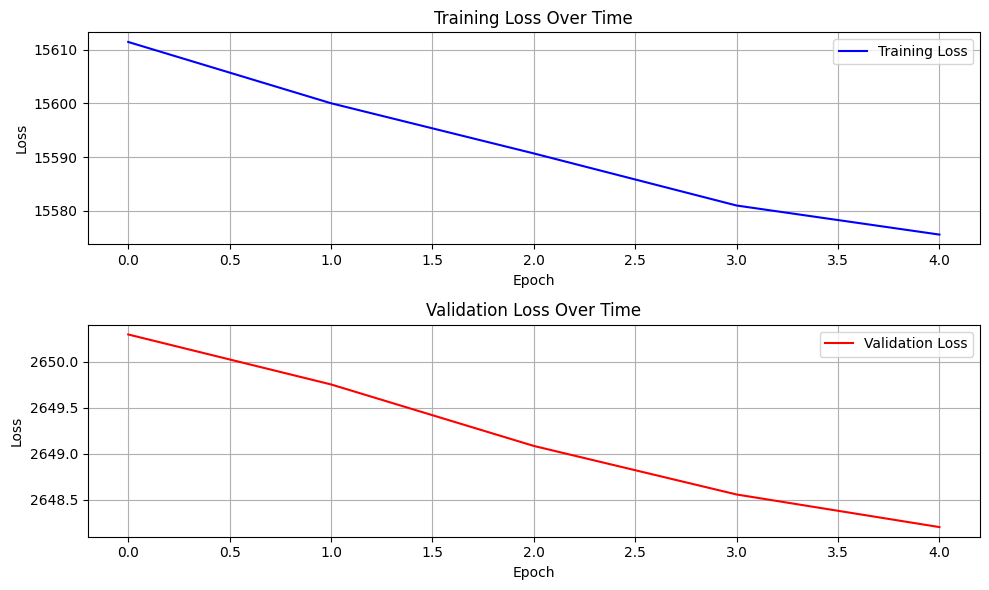

In [15]:
import matplotlib.pyplot as plt

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Training loss subplot
ax1.plot(history.history["loss"], label="Training Loss", color="blue")
ax1.set_title("Training Loss Over Time")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
ax1.grid(True)

# Validation loss subplot
ax2.plot(history.history["val_loss"], label="Validation Loss", color="red")
ax2.set_title("Validation Loss Over Time")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.legend()
ax2.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
# plt.show() # Uncomment to show the plot

Upload models to Hopsworks model registry

In [16]:
mr = project.get_model_registry()

In [30]:
import hopsworks

# project_rec_sys = hopsworks.login()

# fs = project_rec_sys.get_feature_store()

In [32]:
project_n = hopsworks.login(
    hostname_verification=False,
    api_key_value=settings.HOPSWORKS_API_KEY.get_secret_value(),
    trust_store_path=None  # Add this line
)

2025-03-15 13:52:25,986 INFO: Closing external client and cleaning up certificates.
Connection closed.
2025-03-15 13:52:26,124 INFO: Initializing external client
2025-03-15 13:52:26,126 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-03-15 13:52:30,400 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1213659


In [17]:
query_model = hopsworks_integration.two_tower_serving.HopsworksQueryModel(
    model=model.query_model
)
query_model.register(
    mr=mr,
    feature_view=feature_view,
    query_df=dataset.properties["query_df"],
)

item_model = hopsworks_integration.two_tower_serving.HopsworksCandidateModel(
    model=model.item_model
)
item_model.register(
    mr=mr,
    feature_view=feature_view,
    item_df=dataset.properties["item_df"],
)

2025-03-15 23:54:08,996 INFO: Function `compute_embedding` contains input name(s) table_handle, 20873, resource with unsupported characters which will be renamed to query_tower_sequential_string_lookup_none_lookup_lookuptablefindv2_table_handle, query_tower_sequential_embedding_embedding_lookup_20873, query_tower_sequential_1_batch_normalization_1_batchnorm_readvariableop_2_resource in the SavedModel.
INFO:tensorflow:Assets written to: query_model\assets
2025-03-15 23:54:41,025 INFO: Assets written to: query_model\assets


Uploading: 100.000%|██████████| 58/58 elapsed<00:02 remaining<00:002<00:07,  1.43s/it]
Uploading: 100.000%|██████████| 20313281/20313281 elapsed<05:55 remaining<00:0043s/it]
Uploading: 100.000%|██████████| 17424190/17424190 elapsed<04:31 remaining<00:0043s/it]
Uploading: 100.000%|██████████| 838/838 elapsed<00:02 remaining<00:0000:07,  1.43s/it]
Uploading: 100.000%|██████████| 142/142 elapsed<00:02 remaining<00:00<24:56, 374.21s/it]
Model export complete: 100%|██████████| 6/6 [10:45<00:00, 107.62s/it]                   


Model created, explore it at https://c.app.hopsworks.ai:443/p/1213659/models/query_model/2
INFO:tensorflow:Assets written to: candidate_model\assets
2025-03-16 00:05:32,057 INFO: Assets written to: candidate_model\assets


Uploading: 100.000%|██████████| 56/56 elapsed<00:03 remaining<00:002<00:07,  1.44s/it]
Uploading: 100.000%|██████████| 712522/712522 elapsed<00:12 remaining<00:00  1.44s/it]
Uploading: 100.000%|██████████| 2067114/2067114 elapsed<00:33 remaining<00:001.44s/it]
Uploading: 100.000%|██████████| 424/424 elapsed<00:02 remaining<00:0000:07,  1.44s/it]
Uploading: 100.000%|██████████| 94/94 elapsed<00:02 remaining<00:0057<02:13, 33.47s/it]
Model export complete: 100%|██████████| 6/6 [01:06<00:00, 11.15s/it]                   

Model created, explore it at https://c.app.hopsworks.ai:443/p/1213659/models/candidate_model/1
